In [2]:
import pandas as pd

In [15]:
df = pd.read_csv('/home/igor-bond/Downloads/data.csv',encoding='shift-jis')

In [187]:
df.head()

,年月日,最高気温(℃),最低気温(℃),降水量の合計(mm),平均雲量(10分比)
0,2015-01-01,8.2,0.7,0.0,3.8
1,2015-01-02,7.9,-2.2,0.0,5.0
2,2015-01-03,8.9,-1.1,0.0,0.0
3,2015-01-04,9.3,-0.4,0.0,5.3
4,2015-01-05,12.9,1.3,0.0,2.5


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 5 columns):
年月日           1827 non-null object
最高気温(℃)       1827 non-null float64
最低気温(℃)       1827 non-null float64
降水量の合計(mm)    1827 non-null float64
平均雲量(10分比)    1827 non-null float64
dtypes: float64(4), object(1)
memory usage: 71.4+ KB


In [19]:
df.describe().round()

,最高気温(℃),最低気温(℃),降水量の合計(mm),平均雲量(10分比)
count,1827.0,1827.0,1827.0,1827.0
mean,21.0,13.0,5.0,7.0
std,8.0,8.0,14.0,3.0
min,4.0,-4.0,0.0,0.0
25%,14.0,5.0,0.0,4.0
50%,21.0,13.0,0.0,8.0
75%,27.0,20.0,2.0,10.0
max,39.0,28.0,210.0,10.0


In [21]:
import matplotlib.pyplot as plt

In [74]:
xw_axis = []
yw_axis = []
w = 1
for i in df.iloc[:,2]:
    yw_axis.append(int(w))
    xw_axis.append(w)
    w += 1
    

#plt.plot(xw_axis,yw_axis)
#plt.plot(x2_axis,y2_axis)
df.shape

(1827, 5)

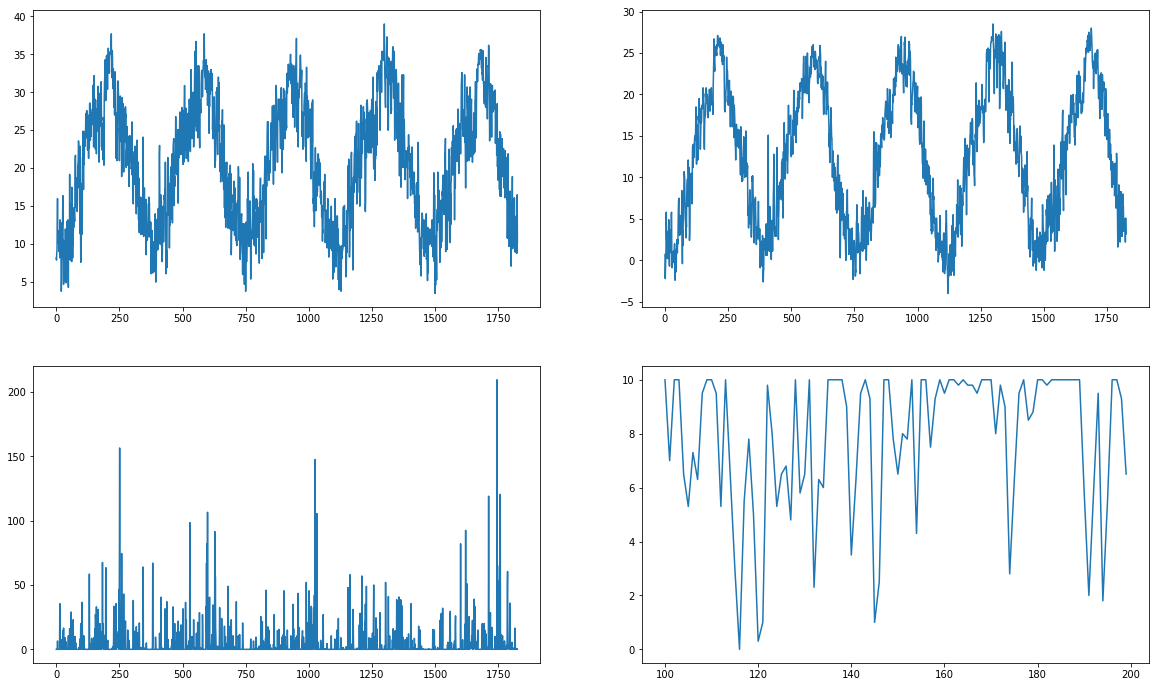

In [185]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

axes.ravel()[0].plot(df.iloc[:,1]) 
axes.ravel()[1].plot(df.iloc[:,2]) 
axes.ravel()[2].plot(df.iloc[:,3]) 
axes.ravel()[3].plot(df.iloc[100:200,4]) 

In [85]:
df.head()

,年月日,最高気温(℃),最低気温(℃),降水量の合計(mm),平均雲量(10分比)
0,2015/1/1,8.2,0.7,0.0,3.8
1,2015/1/2,7.9,-2.2,0.0,5.0
2,2015/1/3,8.9,-1.1,0.0,0.0
3,2015/1/4,9.3,-0.4,0.0,5.3
4,2015/1/5,12.9,1.3,0.0,2.5


In [91]:
df['年月日'] = pd.to_datetime(df['年月日'],format='%Y-%m-%d')

In [92]:
df.head()

,年月日,最高気温(℃),最低気温(℃),降水量の合計(mm),平均雲量(10分比)
0,2015-01-01,8.2,0.7,0.0,3.8
1,2015-01-02,7.9,-2.2,0.0,5.0
2,2015-01-03,8.9,-1.1,0.0,0.0
3,2015-01-04,9.3,-0.4,0.0,5.3
4,2015-01-05,12.9,1.3,0.0,2.5


In [99]:
df['年月日'].dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: 年月日, dtype: int64

In [101]:
for i in range(len(df)):
    m = df['年月日'].dt.month[i]
    n = df['年月日'].dt.day[i]
   # print(m,n)

In [102]:
from sklearn import tree

In [103]:
clf = tree.DecisionTreeClassifier()

In [170]:
features = []
labels = []

In [171]:
print(len(df))

1827


In [172]:
for i in range(1500):
    m = df['年月日'].dt.month[i]
    n = df['年月日'].dt.day[i]
    c = str(m) + str(n)
    features.append([int(c)])

In [173]:
for i in range(1500):
    a = df['最高気温(℃)'][i]
    b = df['最低気温(℃)'][i]
    c = df['降水量の合計(mm)'][i]
    d = df['平均雲量(10分比)'][i]
    labels.append([a,b,d])

In [174]:
clf.fit(labels,features)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [179]:
predict = clf.predict([[25.5,19.6,10.0]])

In [180]:
print(predict)

[69]
